In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

# Information About Data

In [3]:
dataset = pandas.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Preprocessing

In [6]:
dataset.isnull().sum().sum()

343248

NaN Values Handling for Categorical Variables

In [7]:
# Get list of categorical variables
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
for i in categorical_list:
    print(i, dataset[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [9]:
for i in categorical_list:
    print(i, pd.value_counts(dataset[i]).unique())

Date [49 48 46 45 23  8  2  1]
Location [3436 3344 3193 3040 3039 3009 3006 3004 3001 1578]
WindGustDir [9915 9418 9313 9216 9181 9168 9069 8967 8736 8252 8122 8104 7372 7133
 6620 6548]
WindDir9am [11758  9287  9176  9112  8749  8659  8459  8423  8129  7980  7836  7671
  7630  7587  7414  7024]
WindDir3pm [10838 10110  9926  9518  9399  9354  8890  8874  8610  8505  8472  8263
  8156  7870  7857  6590]
RainToday [110319  31880]
RainTomorrow [110316  31877]


In [10]:
pd.value_counts(dataset['Location']).sum()

145460

In [11]:
for i in categorical_list:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

NaN Values Handling for Numerical Variables

In [12]:
numerical = (dataset.dtypes == "float64")
numerical_list = list(numerical[numerical].index)
print("Numerical variables:")
print(numerical_list)

Numerical variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [13]:
for i in numerical_list:
    print(i, dataset[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [14]:
for i in numerical_list:
    dataset[i].fillna(dataset[i].mean(), inplace=True)

In [15]:
for i in numerical_list:
    print(i, dataset[i].unique().sum().sum())

MinTemp 4492.394034380968
MaxTemp 11079.021348275648
Rainfall 41601.96091814992
Evaporation 8835.968231522922
Sunshine 1051.7111775206613
WindGustSpeed 4525.035230071673
WindSpeed9am 1763.0434259149715
WindSpeed3pm 1791.6626567788874
Humidity9am 5118.880831337619
Humidity3pm 5101.539115875505
Pressure9am 554304.2499397983
Pressure3pm 556106.147888831
Cloud9am 49.44746126021525
Cloud3pm 49.5099300829249
Temp9am 7294.990631415587
Temp3pm 10389.58339031801


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [17]:
dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [19]:
dataset.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
38408,2014-05-23,WaggaWagga,9.6,24.2,0.0,1.800000,8.100000,W,43.0,E,...,68.0,34.0,1018.30000,1013.400000,1.000000,2.00000,14.9,23.5,No,No
45537,2017-05-07,Wollongong,14.4,19.8,0.0,5.468232,7.611178,NW,41.0,W,...,40.0,40.0,1023.40000,1023.400000,4.447461,4.50993,16.2,18.5,No,No
58407,2009-08-23,Bendigo,5.3,17.7,1.4,2.400000,7.611178,N,50.0,N,...,100.0,50.0,1009.20000,1004.100000,8.000000,5.00000,8.9,17.0,Yes,No
129351,2016-02-25,Walpole,11.6,21.3,0.0,5.468232,7.611178,SE,26.0,SSW,...,69.0,56.0,1023.40000,1022.700000,4.447461,4.50993,17.4,20.6,No,No
6992,2011-09-01,Cobar,6.7,21.8,0.0,4.000000,7.611178,ESE,24.0,SE,...,47.0,22.0,1024.40000,1020.900000,0.000000,1.00000,14.8,21.3,No,No
19253,2012-03-14,NorahHead,18.4,25.3,0.0,5.468232,7.611178,NE,35.0,SSW,...,88.0,77.0,1020.60000,1017.900000,4.447461,4.50993,21.2,23.6,No,No
103491,2011-08-27,Nuriootpa,-0.6,14.5,0.0,2.200000,8.200000,WSW,24.0,N,...,95.0,68.0,1024.90000,1022.300000,8.000000,6.00000,6.5,12.3,No,No
135642,2016-04-23,Launceston,4.1,20.1,0.0,5.468232,7.611178,NW,24.0,NNW,...,79.0,55.0,1017.64994,1015.255889,4.447461,4.50993,9.5,19.1,No,No
73472,2013-05-10,Nhil,12.0,26.3,0.0,5.468232,7.611178,N,33.0,NE,...,66.0,26.0,1028.40000,1024.800000,4.447461,4.50993,13.7,25.4,No,No
40624,2012-01-22,Williamtown,20.0,27.1,0.6,19.400000,7.611178,SSE,50.0,SSE,...,54.0,57.0,1019.70000,1020.200000,6.000000,5.00000,23.1,25.5,No,Yes


In [20]:
unique_float64 = (dataset.dtypes == "float64")
unique_float64 = list(numerical[numerical].index)
print("Numerical variables:")
print(unique_float64)

Numerical variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
for i in unique_float64:
    print(i, dataset[i].unique().sum())

MinTemp 4492.394034380968
MaxTemp 11079.021348275648
Rainfall 41601.96091814992
Evaporation 8835.968231522922
Sunshine 1051.7111775206613
WindGustSpeed 4525.035230071673
WindSpeed9am 1763.0434259149715
WindSpeed3pm 1791.6626567788874
Humidity9am 5118.880831337619
Humidity3pm 5101.539115875505
Pressure9am 554304.2499397983
Pressure3pm 556106.147888831
Cloud9am 49.44746126021525
Cloud3pm 49.5099300829249
Temp9am 7294.990631415587
Temp3pm 10389.58339031801


In [22]:
unique_object = (dataset.dtypes == "object")
unique_object = list(numerical[numerical].index)
print("Numerical variables:")
print(numerical_list)

Numerical variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Label Encoding

Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [23]:
RainToday_mapping = {'No':0, 'Yes':1}
RainTomorrow_mapping = {'No':0, 'Yes':1}

In [24]:
dataset['RainToday'] = dataset['RainToday'].map(RainToday_mapping)
dataset['RainTomorrow'] = dataset['RainTomorrow'].map(RainTomorrow_mapping)
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


# One-Hot Encoding

One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

In this part, I converted categorical datas to the binary values. This operation increases the accuracy.

In [25]:
onehotencoder = OneHotEncoder()

In [26]:
dataset['Location'] = pd.Categorical(dataset['Location'])
datasetDummies_Location = pd.get_dummies(dataset['Location'], prefix = 'Location_encoded')
datasetDummies_Location

,Location_encoded_Adelaide,Location_encoded_Albany,Location_encoded_Albury,Location_encoded_AliceSprings,Location_encoded_BadgerysCreek,Location_encoded_Ballarat,Location_encoded_Bendigo,Location_encoded_Brisbane,Location_encoded_Cairns,Location_encoded_Canberra,...,Location_encoded_Townsville,Location_encoded_Tuggeranong,Location_encoded_Uluru,Location_encoded_WaggaWagga,Location_encoded_Walpole,Location_encoded_Watsonia,Location_encoded_Williamtown,Location_encoded_Witchcliffe,Location_encoded_Wollongong,Location_encoded_Woomera
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
dataset['WindGustDir'] = pd.Categorical(dataset['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(dataset['WindGustDir'], prefix = 'WindGustDir_encoded')
datasetDummies_WindGustDir

,WindGustDir_encoded_E,WindGustDir_encoded_ENE,WindGustDir_encoded_ESE,WindGustDir_encoded_N,WindGustDir_encoded_NE,WindGustDir_encoded_NNE,WindGustDir_encoded_NNW,WindGustDir_encoded_NW,WindGustDir_encoded_S,WindGustDir_encoded_SE,WindGustDir_encoded_SSE,WindGustDir_encoded_SSW,WindGustDir_encoded_SW,WindGustDir_encoded_W,WindGustDir_encoded_WNW,WindGustDir_encoded_WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
145457,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
dataset['WindDir9am'] = pd.Categorical(dataset['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(dataset['WindDir9am'], prefix = 'WindDir9am_encoded')
datasetDummies_WindDir9am

,WindDir9am_encoded_E,WindDir9am_encoded_ENE,WindDir9am_encoded_ESE,WindDir9am_encoded_N,WindDir9am_encoded_NE,WindDir9am_encoded_NNE,WindDir9am_encoded_NNW,WindDir9am_encoded_NW,WindDir9am_encoded_S,WindDir9am_encoded_SE,WindDir9am_encoded_SSE,WindDir9am_encoded_SSW,WindDir9am_encoded_SW,WindDir9am_encoded_W,WindDir9am_encoded_WNW,WindDir9am_encoded_WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
dataset['WindDir3pm'] = pd.Categorical(dataset['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(dataset['WindDir3pm'], prefix = 'WindDir3pm_encoded')
datasetDummies_WindDir3pm

,WindDir3pm_encoded_E,WindDir3pm_encoded_ENE,WindDir3pm_encoded_ESE,WindDir3pm_encoded_N,WindDir3pm_encoded_NE,WindDir3pm_encoded_NNE,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145458,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
dataset.drop("Location", axis=1, inplace=True)
dataset.drop("WindGustDir", axis=1, inplace=True)
dataset.drop("WindDir9am", axis=1, inplace=True)
dataset.drop("WindDir3pm", axis=1, inplace=True)

In [31]:
dataset = pd.concat([dataset, datasetDummies_Location], axis=1)
dataset = pd.concat([dataset, datasetDummies_WindGustDir], axis=1)
dataset = pd.concat([dataset, datasetDummies_WindDir9am], axis=1)
dataset = pd.concat([dataset, datasetDummies_WindDir3pm], axis=1)
dataset

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
0,2008-12-01,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,...,0,0,0,0,0,0,0,0,1,0
145458,2017-06-24,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
list(dataset.columns)

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Location_encoded_Adelaide',
 'Location_encoded_Albany',
 'Location_encoded_Albury',
 'Location_encoded_AliceSprings',
 'Location_encoded_BadgerysCreek',
 'Location_encoded_Ballarat',
 'Location_encoded_Bendigo',
 'Location_encoded_Brisbane',
 'Location_encoded_Cairns',
 'Location_encoded_Canberra',
 'Location_encoded_Cobar',
 'Location_encoded_CoffsHarbour',
 'Location_encoded_Dartmoor',
 'Location_encoded_Darwin',
 'Location_encoded_GoldCoast',
 'Location_encoded_Hobart',
 'Location_encoded_Katherine',
 'Location_encoded_Launceston',
 'Location_encoded_Melbourne',
 'Location_encoded_MelbourneAirport',
 'Location_encoded_Mildura',
 'Location_encoded_Moree',
 'Location_encoded_MountGambier',
 'Location_encoded_MountGi

In [33]:
features = ['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Location_encoded_Adelaide',
 'Location_encoded_Albany',
 'Location_encoded_Albury',
 'Location_encoded_AliceSprings',
 'Location_encoded_BadgerysCreek',
 'Location_encoded_Ballarat',
 'Location_encoded_Bendigo',
 'Location_encoded_Brisbane',
 'Location_encoded_Cairns',
 'Location_encoded_Canberra',
 'Location_encoded_Cobar',
 'Location_encoded_CoffsHarbour',
 'Location_encoded_Dartmoor',
 'Location_encoded_Darwin',
 'Location_encoded_GoldCoast',
 'Location_encoded_Hobart',
 'Location_encoded_Katherine',
 'Location_encoded_Launceston',
 'Location_encoded_Melbourne',
 'Location_encoded_MelbourneAirport',
 'Location_encoded_Mildura',
 'Location_encoded_Moree',
 'Location_encoded_MountGambier',
 'Location_encoded_MountGinini',
 'Location_encoded_Newcastle',
 'Location_encoded_Nhil',
 'Location_encoded_NorahHead',
 'Location_encoded_NorfolkIsland',
 'Location_encoded_Nuriootpa',
 'Location_encoded_PearceRAAF',
 'Location_encoded_Penrith',
 'Location_encoded_Perth',
 'Location_encoded_PerthAirport',
 'Location_encoded_Portland',
 'Location_encoded_Richmond',
 'Location_encoded_Sale',
 'Location_encoded_SalmonGums',
 'Location_encoded_Sydney',
 'Location_encoded_SydneyAirport',
 'Location_encoded_Townsville',
 'Location_encoded_Tuggeranong',
 'Location_encoded_Uluru',
 'Location_encoded_WaggaWagga',
 'Location_encoded_Walpole',
 'Location_encoded_Watsonia',
 'Location_encoded_Williamtown',
 'Location_encoded_Witchcliffe',
 'Location_encoded_Wollongong',
 'Location_encoded_Woomera',
 'WindGustDir_encoded_E',
 'WindGustDir_encoded_ENE',
 'WindGustDir_encoded_ESE',
 'WindGustDir_encoded_N',
 'WindGustDir_encoded_NE',
 'WindGustDir_encoded_NNE',
 'WindGustDir_encoded_NNW',
 'WindGustDir_encoded_NW',
 'WindGustDir_encoded_S',
 'WindGustDir_encoded_SE',
 'WindGustDir_encoded_SSE',
 'WindGustDir_encoded_SSW',
 'WindGustDir_encoded_SW',
 'WindGustDir_encoded_W',
 'WindGustDir_encoded_WNW',
 'WindGustDir_encoded_WSW',
 'WindDir9am_encoded_E',
 'WindDir9am_encoded_ENE',
 'WindDir9am_encoded_ESE',
 'WindDir9am_encoded_N',
 'WindDir9am_encoded_NE',
 'WindDir9am_encoded_NNE',
 'WindDir9am_encoded_NNW',
 'WindDir9am_encoded_NW',
 'WindDir9am_encoded_S',
 'WindDir9am_encoded_SE',
 'WindDir9am_encoded_SSE',
 'WindDir9am_encoded_SSW',
 'WindDir9am_encoded_SW',
 'WindDir9am_encoded_W',
 'WindDir9am_encoded_WNW',
 'WindDir9am_encoded_WSW',
 'WindDir3pm_encoded_E',
 'WindDir3pm_encoded_ENE',
 'WindDir3pm_encoded_ESE',
 'WindDir3pm_encoded_N',
 'WindDir3pm_encoded_NE',
 'WindDir3pm_encoded_NNE',
 'WindDir3pm_encoded_NNW',
 'WindDir3pm_encoded_NW',
 'WindDir3pm_encoded_S',
 'WindDir3pm_encoded_SE',
 'WindDir3pm_encoded_SSE',
 'WindDir3pm_encoded_SSW',
 'WindDir3pm_encoded_SW',
 'WindDir3pm_encoded_W',
 'WindDir3pm_encoded_WNW',
 'WindDir3pm_encoded_WSW']

label = ['RainTomorrow']

X = dataset[features]
y = dataset[label]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 145460
Total # of sample in train dataset: 97458
Total # of sample in validation dataset: 24001
Total # of sample in test dataset: 24001


# Scores of Models

In [35]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB",'BernoulliNB','LogisticRegression','RandomForestClassifier',
             'DecisionTreeClassifier', 'GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 64.74481315028012
Validation score of trained model: 64.73480271655347
Test score of trained model: 64.23899004208158
 
Confussion Matrix: 
[[11711  1519]
 [ 7064  3707]]

Accuracy : 0.6423899004208158
Precision: 0.7093379257558362
Recall   : 0.3441648871971033
F1 score : 0.4634618991060823
Specificity : 0.8851851851851852

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.89      0.73     13230
           1       0.71      0.34      0.46     10771

    accuracy                           0.64     24001
   macro avg       0.67      0.61      0.60     24001
weighted avg       0.66      0.64      0.61     24001



############################################################################



BernoulliNB
Train score of trained model: 76.86593199121673
Validation score of trained model: 76.48847964668138
Test score of trained model: 76.56764301487438
 
Confussion Matrix: 
[[16048  2897]
 [ 

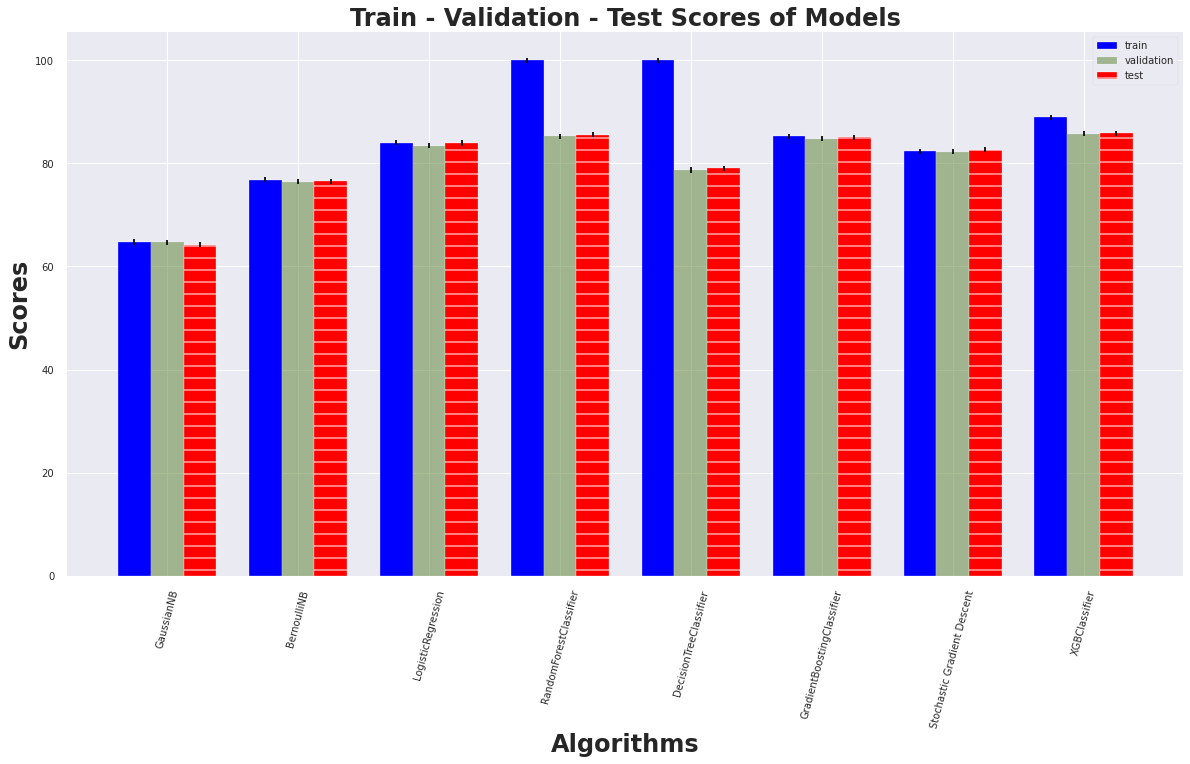

In [36]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB",'BernoulliNB','LogisticRegression','RandomForestClassifier',
             'DecisionTreeClassifier', 'GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [37]:
for i in range(8):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 64.23899004208158
Accuracy of BernoulliNB -----> 76.56764301487438
Accuracy of LogisticRegression -----> 83.95483521519937
Accuracy of RandomForestClassifier -----> 85.54643556518478
Accuracy of DecisionTreeClassifier -----> 79.06753885254781
Accuracy of GradientBoostingClassifier -----> 85.09645431440357
Accuracy of Stochastic Gradient Descent -----> 82.65072288654639
Accuracy of XGBClassifier -----> 85.8797550102079
